# Q2

In [1]:
import pandas as pd

df = pd.read_csv('satelite_20.csv')
x, y = df["log_azimuth"], df["log_altitiude"]
display(df.head())
display(df["observed_image_output"].value_counts())

df_test = pd.read_csv("satelite_20_test.csv")
x_test, y_test = df_test["log_azimuth"], df_test["log_altitiude"]

,log_azimuth,log_altitiude,lens_size,months_in_operation,observed_image_output
0,2.351222,2.996789,8.041122,1,0
1,2.379440,3.050773,5.448220,3,0
2,2.441207,3.071607,2.134721,3,0
3,2.454324,3.127072,7.271947,1,0
4,2.465330,3.162127,6.854447,0,0


2    51
1    51
0    51
Name: observed_image_output, dtype: int64

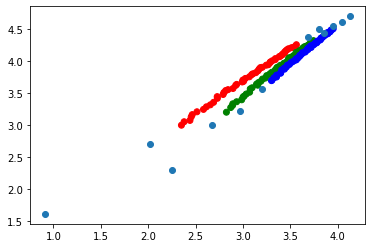

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

colors = {0: "r", 1: "g", 2: "b"}
plt.scatter(df["log_azimuth"], df["log_altitiude"], c=[colors[sat] for sat in df["observed_image_output"]])
plt.scatter(x_test, y_test)

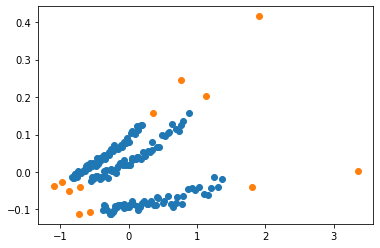

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[["log_azimuth", "log_altitiude"]])
x_pca, y_pca = df_pca.T

df_test_pca = pca.transform(df_test[["log_azimuth", "log_altitiude"]])
x_test_pca, y_test_pca = df_test_pca.T

plt.scatter(x_pca, y_pca)
plt.scatter(x_test_pca, y_test_pca)

array([0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2])

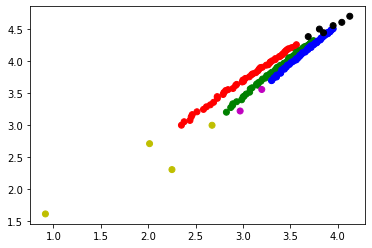

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=4)
rf.fit(df[["log_azimuth", "log_altitiude"]], df["observed_image_output"])

display(rf.predict(df_test[["log_azimuth", "log_altitiude"]]))


colors = {0: "r", 1: "g", 2: "b"}
colors_test = {0: "y", 1: "m", 2: "k"}

plt.scatter(x, y, c=[colors[sat] for sat in df["observed_image_output"]])
predictions = rf.predict(df_test[["log_azimuth", "log_altitiude"]])
plt.scatter(x_test, y_test, c=[colors_test[sat] for sat in predictions])

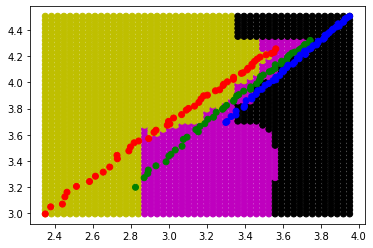

In [5]:
import numpy as np
from itertools import product

x_decision = np.linspace(x.min(), x.max(), 50)
y_decision = np.linspace(y.min(), y.max(), 50)
x_decision, y_decision = np.array(list(product(x_decision, y_decision))).T

predictions_decision = rf.predict(pd.DataFrame({"log_azimuth": x_decision, "log_altitiude": y_decision}))

plt.scatter(x_decision, y_decision, c=[colors_test[sat] for sat in predictions_decision])
plt.scatter(x, y, c=[colors[sat] for sat in df["observed_image_output"]])

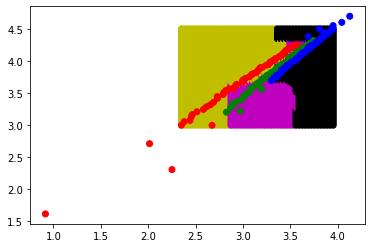

In [6]:
plt.scatter(x_decision, y_decision, c=[colors_test[sat] for sat in predictions_decision])
plt.scatter(x, y, c=[colors[sat] for sat in df["observed_image_output"]])
plt.scatter(x_test, y_test, c=[colors[sat] for sat in predictions])

array([0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 2])

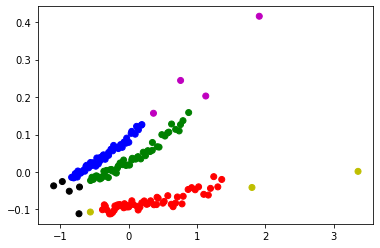

In [7]:
rf_pca = RandomForestClassifier(max_depth=4)
rf_pca.fit(pca.fit_transform(df[["log_azimuth", "log_altitiude"]]), df["observed_image_output"])

display(rf_pca.predict(pca.transform(df_test[["log_azimuth", "log_altitiude"]])))

colors = {0: "r", 1: "g", 2: "b"}
colors_test = {0: "y", 1: "m", 2: "k"}

plt.scatter(x_pca, y_pca, c=[colors[sat] for sat in df["observed_image_output"]])
df_test_pca = pca.transform(df_test[["log_azimuth", "log_altitiude"]])
predictions = rf_pca.predict(df_test_pca)
plt.scatter(x_test_pca, y_test_pca, c=[colors_test[sat] for sat in predictions])

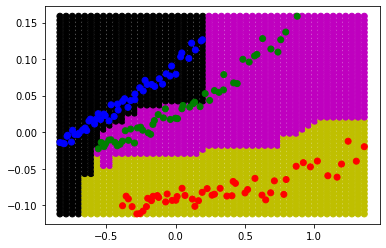

In [8]:
x_decision_pca = np.linspace(x_pca.min(), x_pca.max(), 50)
y_decision_pca = np.linspace(y_pca.min(), y_pca.max(), 50)
x_decision_pca, y_decision_pca = np.array(list(product(x_decision_pca, y_decision_pca))).T

predictions_decision_pca = rf_pca.predict(pd.DataFrame({"log_azimuth": x_decision_pca, "log_altitiude": y_decision_pca}))

plt.scatter(x_decision_pca, y_decision_pca, c=[colors_test[sat] for sat in predictions_decision_pca])
plt.scatter(x_pca, y_pca, c=[colors[sat] for sat in df["observed_image_output"]])

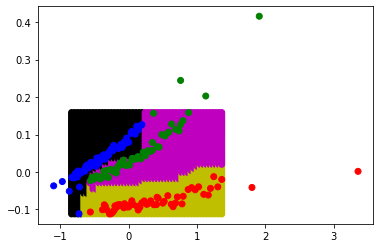

In [9]:
plt.scatter(x_decision_pca, y_decision_pca, c=[colors_test[sat] for sat in predictions_decision_pca])
plt.scatter(x_pca, y_pca, c=[colors[sat] for sat in df["observed_image_output"]])
plt.scatter(x_test_pca, y_test_pca, c=[colors[sat] for sat in predictions])

In [ ]:
# PCA (which automatically de-means) helps
# ML models don't extrapolate well